In [1]:
import pandas as pd
import numpy as np


In [2]:
df =pd.read_excel('Participants_Data_News_category/Data_Train.xlsx')

In [3]:
df.sample(5)

,STORY,SECTION
7326,"For its 2019 manifesto, BJP has simply copy pa...",0
434,The court’s preliminary injunction barred Appl...,1
6290,These features will be broadly available in th...,1
4818,The single interface where users can swipe pos...,1
845,NEW DELHI: The initial public offering of Neog...,3


In [4]:
df['SECTION'].unique()

array([3, 0, 1, 2], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [6]:
df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
print(df['SECTION'].count())#total value

print(df['SECTION'].value_counts())

7628
1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64


1    36.339801
2    25.222863
0    22.102779
3    16.334557
Name: SECTION, dtype: float64


<Axes: xlabel='SECTION', ylabel='Percent'>

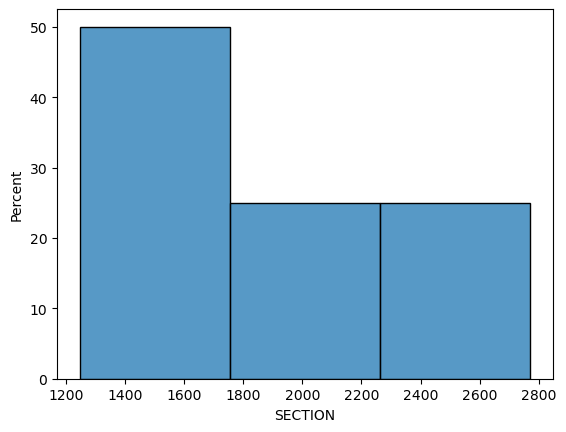

In [9]:
#PRESENTAGE DISTRIBUTION OF ALL DATA SET

print((df['SECTION'].value_counts()/df['SECTION'].count())*100)

sns.histplot(df['SECTION'].value_counts(),stat='percent')

<Axes: >

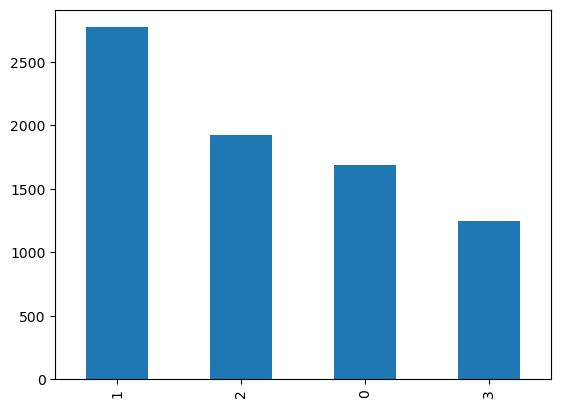

In [10]:
df['SECTION'].value_counts().plot(kind='bar')

In [11]:
df.groupby('SECTION').describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  The consensus reads, “Exciting, entertaining, ...    3
3        1246   1233  This story has been published from a wire agen...   11

# TEXT PreProcessing Task

In [12]:
#removing the punctuation
#removing the stopwords 
#removing the null values
#removing the numbers
#removing the html links tags
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [13]:
df['STORY'][5]

"BEIJING: Chinese tech giant Huawei has announced plans to release a next-generation smartphone based on its own technology instead of US components, stepping up efforts to compete directly with Western industry leaders.\n\n\nThursday's announcement comes as Huawei Technologies Ltd., the world's biggest maker of network gear for phone companies, combats US warnings the company might be a security risk."

In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def pre_process(text):
    
    #removing the punctuation
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    
    #removing the number
    text =re.sub('[0-9]','',text)
    
    #removing the stopwords
    no_stop=[word for word in text.split() if word not in stopwords.words('english')]
    
    no_stop=' '.join(no_stop)
    
    
    #doing the lemaatization
    lemmatizer=WordNetLemmatizer()
    
    #it will split the sentence into the words
    word_tokens = word_tokenize(no_stop)
    fin_txt =' '.join([lemmatizer.lemmatize(word) for word in word_tokens]) 
    
    
    return fin_txt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#all the preprocess
df['STORY'] = df['STORY'].apply(pre_process)

In [16]:
df.sample(5)

,STORY,SECTION
3058,Expect new iPads priced notch higher previous ...,1
2960,In statement US medium Samsung said initial fi...,1
569,As Jaaved Jaaferi brought house Feroz Khan car...,2
5162,The character movie created new timeline went ...,2
4570,Chris Hemsworth expressed interest playing Mar...,2


In [17]:
df['STORY']=df['STORY'].apply(remove_emoji)

In [18]:
df['STORY'][5858]

'happiest happy  mind heart light heaven Happy happy joy joy unique Artist boy I know never changing sooooproud Ridzajaanturns loveyoumadly ” Sussanne Khan wrote along video'

In [19]:
df.isnull().sum()

STORY      0
SECTION    0
dtype: int64

# Feature Engineering or Feature Extraction

<b>Genrate the custom column</b>
<ol>length of text</ol>
<ol>Total word</ol>
<ol>Normaliation</ol>
<ol></ol>
<ol></ol>
<ol></ol>
<ol></ol>

In [20]:
df.sample(4)

,STORY,SECTION
2289,Devotees throng street Nagpur celebrate annual...,0
6591,Apple longer break detailed number iPhone ship...,1
1495,He enjoyed screentime followed quest gain Infi...,2
5782,In statement RCom said ₹ crore due Ericsson in...,3


In [21]:
#len(df['STORY'][0])

In [22]:
#lebgth of text
df['length_text'] = df['STORY'].apply(len)

In [23]:
df.head()

,STORY,SECTION,length_text
0,But painful huge reversal fee income unheard a...,3,574
1,How formidable opposition alliance among Congr...,0,112
2,Most Asian currency trading lower today South ...,3,241
3,If want answer question click ‘ Answer ’ After...,1,383
4,In global market gold price edged today disapp...,3,245


In [24]:
df['STORY'][0]

'But painful huge reversal fee income unheard among private sector lender Essentially mean Yes Bank took granted fee structured loan deal paid accounted upfront book As borrower turned defaulter fee tied loan deal fell crack Gill vowed shift safer accounting practice amortizing fee income rather booking upfront Gill ’ s move mend past way mean nasty surprise future This good news considering investor love clean image loathe uncertainty But gain without pain promise strong stable balance sheet come sacrifice well Investors give hope phenomenal growth promise made Kapoor'

In [25]:
#[count(word) for word in df['STORY'][0].split()]

df['word_length'] = df['STORY'].apply(lambda row:len(row.split(' ')) if not pd.isnull(row) else 0)

In [26]:
df['word_length'].min()

7

In [27]:
df[df['word_length']==7]['STORY']

3570    Tamilrockers successfully evaded authority als...
Name: STORY, dtype: object

In [28]:
df['STORY'][3570]

'Tamilrockers successfully evaded authority also acquired audience'

In [29]:
df.head()

,STORY,SECTION,length_text,word_length
0,But painful huge reversal fee income unheard a...,3,574,88
1,How formidable opposition alliance among Congr...,0,112,14
2,Most Asian currency trading lower today South ...,3,241,35
3,If want answer question click ‘ Answer ’ After...,1,383,61
4,In global market gold price edged today disapp...,3,245,36


# EDA to Check the created column will help in prediction or not

In [30]:
import seaborn as sns

<Axes: xlabel='length_text', ylabel='Percent'>

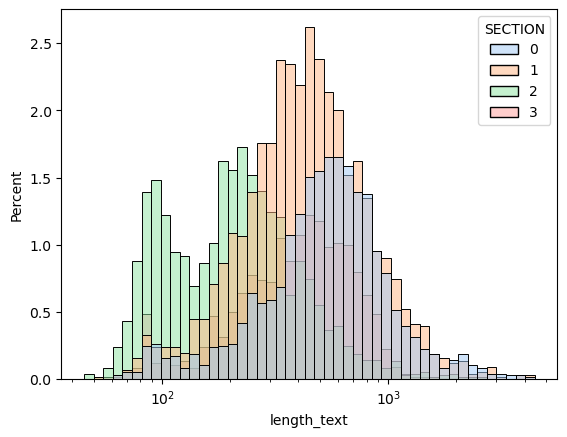

In [31]:
sns.histplot(data=df,x=df['length_text'],hue=df['SECTION'],stat='percent',palette='pastel',log_scale=True)

In [32]:
#sns.histplot(data=df,x=df['word_length'],hue=df['SECTION'],stat='percent',palette='pastel',log_scale=True)

# Vectorization
converting text data into the vector formet to better understand by our model


In [33]:
df['STORY'][0]

'But painful huge reversal fee income unheard among private sector lender Essentially mean Yes Bank took granted fee structured loan deal paid accounted upfront book As borrower turned defaulter fee tied loan deal fell crack Gill vowed shift safer accounting practice amortizing fee income rather booking upfront Gill ’ s move mend past way mean nasty surprise future This good news considering investor love clean image loathe uncertainty But gain without pain promise strong stable balance sheet come sacrifice well Investors give hope phenomenal growth promise made Kapoor'

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
df['STORY'][0]

'But painful huge reversal fee income unheard among private sector lender Essentially mean Yes Bank took granted fee structured loan deal paid accounted upfront book As borrower turned defaulter fee tied loan deal fell crack Gill vowed shift safer accounting practice amortizing fee income rather booking upfront Gill ’ s move mend past way mean nasty surprise future This good news considering investor love clean image loathe uncertainty But gain without pain promise strong stable balance sheet come sacrifice well Investors give hope phenomenal growth promise made Kapoor'

In [36]:
#final function which wil use in the vectorization step

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

def text_pre_process(text):
    
    #removing the punctuation
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    
    #removing the number
    text =re.sub('[0-9]','',text)
    
    #removing the stopwords
    no_stop=[word for word in text.split() if word not in stopwords.words('english')]
    
    no_stop=' '.join(no_stop)
    
    #removing the emoji in the text
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    rem_emooji_text = emoji_pattern.sub(r'', no_stop)

    
    #doing the lemaatization
    lemmatizer=WordNetLemmatizer()
    
    #it will split the sentence into the words
    word_tokens = word_tokenize(rem_emooji_text)
    fin_txt =[lemmatizer.lemmatize(word) for word in word_tokens] 
    
    
    return fin_txt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
remove_emoji(df['STORY'][5858])

'happiest happy  mind heart light heaven Happy happy joy joy unique Artist boy I know never changing sooooproud Ridzajaanturns loveyoumadly ” Sussanne Khan wrote along video'

In [38]:
df['STORY'][5858]

'happiest happy  mind heart light heaven Happy happy joy joy unique Artist boy I know never changing sooooproud Ridzajaanturns loveyoumadly ” Sussanne Khan wrote along video'

In [39]:
df.head()

,STORY,SECTION,length_text,word_length
0,But painful huge reversal fee income unheard a...,3,574,88
1,How formidable opposition alliance among Congr...,0,112,14
2,Most Asian currency trading lower today South ...,3,241,35
3,If want answer question click ‘ Answer ’ After...,1,383,61
4,In global market gold price edged today disapp...,3,245,36


In [40]:
#now creating the word vectorizer algorithm to work

#DOING THE bag of words vectorization
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_pre_process).fit(df['STORY'])

In [41]:
bow_transformer

CountVectorizer(analyzer=<function text_pre_process at 0x000001922A2CC2C0>)

In [42]:
#THIS IS THE NUMBER OF TOTAL UNIQUE WORDS IN THE WHOLE CORPUS

len(bow_transformer.vocabulary_)

37366

In [43]:
bow_transformer.vocabulary_

{'But': 2243,
 'painful': 29325,
 'huge': 25150,
 'reversal': 31917,
 'fee': 23276,
 'income': 25552,
 'unheard': 35938,
 'among': 16971,
 'private': 30504,
 'sector': 32587,
 'lender': 26752,
 'Essentially': 4544,
 'mean': 27473,
 'Yes': 16135,
 'Bank': 1482,
 'took': 35238,
 'granted': 24387,
 'structured': 34204,
 'loan': 26961,
 'deal': 20832,
 'paid': 29320,
 'accounted': 16436,
 'upfront': 36145,
 'book': 18367,
 'As': 993,
 'borrower': 18408,
 'turned': 35629,
 'defaulter': 20961,
 'tied': 35118,
 'fell': 23289,
 'crack': 20404,
 'Gill': 5443,
 'vowed': 36591,
 'shift': 32902,
 'safer': 32247,
 'accounting': 16437,
 'practice': 30213,
 'amortizing': 16979,
 'rather': 31079,
 'booking': 18369,
 '’': 37346,
 'move': 28078,
 'mend': 27565,
 'past': 29471,
 'way': 36733,
 'nasty': 28275,
 'surprise': 34479,
 'future': 23999,
 'This': 14573,
 'good': 24302,
 'news': 28426,
 'considering': 20027,
 'investor': 26118,
 'love': 27094,
 'clean': 19414,
 'image': 25373,
 'loathe': 26964,
 

In [44]:
df['STORY'][3570]

'Tamilrockers successfully evaded authority also acquired audience'

In [45]:

#THIS IS CREATING THE 37366 COLUMN TO A SINGL DOC 
bow0 = bow_transformer.transform([df['STORY'][3570]])
print(bow0)#THIS IS TELLING THE WHICH XOLUMN HAVE THE VALUE AND HOW MUCH TIME IT APPER IN THE WHOLE CORPUS
bow0.shape

  (0, 14309)	1
  (0, 16485)	1
  (0, 16909)	1
  (0, 17535)	1
  (0, 17583)	1
  (0, 22727)	1
  (0, 34330)	1


(1, 37366)

In [46]:
#NOW TRANSFORMING THE WHOLE TEXT DOCUMNET INTO THE VECTOR FORM
bag_cor=bow_transformer.transform(df['STORY'])

In [47]:
print('Shape of Sparse Matrix: ', bag_cor.shape)
print('Amount of Non-Zero occurences: ', bag_cor.nnz)

Shape of Sparse Matrix:  (7628, 37366)
Amount of Non-Zero occurences:  414817


In [48]:
#optimizing the Bag of Words with TFIDF technique
#TF -IDF transsformer
#we use tfidf transformer becuase it perfrom extra step NOrmalization
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bag_cor)

In [49]:
tfidf_transformer

TfidfTransformer()

In [50]:
print(tfidf_transformer.transform(bow0))#this is only transforming one doc into using the tfidf will return the tfidf frequency in the whole corpus




  (0, 34330)	0.40184682314878395
  (0, 22727)	0.538883326811997
  (0, 17583)	0.3478936262784853
  (0, 17535)	0.2864912199194279
  (0, 16909)	0.13703726826382162
  (0, 16485)	0.38106005714334484
  (0, 14309)	0.42547704576139966


In [51]:
#now transforming the whole BAg of words corpus into the tfidf transforme
story_tfidf = tfidf_transformer.transform(bag_cor)

In [52]:
story_tfidf.shape

(7628, 37366)

In [53]:
print(story_tfidf[:1])

  (0, 37346)	0.028530891763480833
  (0, 36991)	0.06117086811537767
  (0, 36807)	0.05741616748655896
  (0, 36733)	0.05923092601715939
  (0, 36591)	0.12758256213306418
  (0, 36145)	0.23916786821818137
  (0, 35938)	0.14478489230365854
  (0, 35772)	0.09347058761651476
  (0, 35629)	0.08589113433716208
  (0, 35238)	0.07347921453764354
  (0, 35118)	0.10346191058259437
  (0, 34479)	0.08803410767931644
  (0, 34204)	0.12516883445337026
  (0, 34190)	0.07132666136300277
  (0, 33828)	0.09126932229702363
  (0, 32902)	0.08702354830292684
  (0, 32890)	0.10346191058259437
  (0, 32587)	0.0774969844970997
  (0, 32247)	0.11672910019767622
  (0, 32230)	0.10953363466759936
  (0, 31917)	0.12307796843288264
  (0, 31079)	0.08824428849562609
  (0, 30651)	0.14953383612846916
  (0, 30504)	0.07954226610195567
  (0, 30213)	0.09317790179187543
  :	:
  (0, 23289)	0.07432581183251401
  (0, 23276)	0.3855384839092526
  (0, 20961)	0.13043739604447865
  (0, 20832)	0.14222530050836235
  (0, 20404)	0.10873047217370274
  (0,

# Training a Model

In [54]:
df.sample(5)

,STORY,SECTION,length_text,word_length
7086,The movie follows event Miss World competition...,2,82,12
6638,This feature added Android version instant mes...,1,313,35
1090,“ BankChain launched India February explore bu...,1,735,102
6490,It could explained away bringing different rea...,2,414,53
1699,S rocking chart Hollywood Indian show audience...,2,506,75


In [55]:
import numpy as np
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split


# Assuming story_tfidf is your TF-IDF matrix and custom_feature is your custom feature matrix
custom_feature = df.iloc[:, 2:]

# Convert custom_feature to a sparse matrix
custom_feature_sparse = csr_matrix(custom_feature)

#combing the custom feature and tfidf feature

combined_feature=hstack([story_tfidf,custom_feature_sparse])

y=df['SECTION']

X_train, X_test, y_train, y_test = train_test_split(combined_feature, y, test_size=0.3, random_state=42)


In [56]:
X_train.shape

(5339, 37368)

In [57]:
#training the ML model using the navive Bayes classifier

from sklearn.naive_bayes import MultinomialNB

news_category_Detect_model = MultinomialNB()

news_category_Detect_model.fit(X_train,y_train)

MultinomialNB()

In [58]:
prediction = news_category_Detect_model.predict(X_test)

In [59]:
print(prediction)

[1 0 1 ... 1 0 1]


In [60]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,prediction))

print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

0.48405417212756663
              precision    recall  f1-score   support

           0       0.93      0.50      0.65       491
           1       0.42      1.00      0.59       846
           2       1.00      0.01      0.01       598
           3       1.00      0.04      0.08       354

    accuracy                           0.48      2289
   macro avg       0.84      0.39      0.33      2289
weighted avg       0.77      0.48      0.37      2289

[[245 246   0   0]
 [  1 845   0   0]
 [ 16 579   3   0]
 [  1 338   0  15]]


Accuracy score of using the NAive bayse is about 48% which is very low so we using some othe rclassification models

In [61]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
predict = rfc.predict(X_test)

#score of Random Forest Classifier model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,predict))

print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))

0.944517256443862
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       491
           1       0.94      0.96      0.95       846
           2       0.93      0.97      0.95       598
           3       0.97      0.90      0.93       354

    accuracy                           0.94      2289
   macro avg       0.95      0.94      0.94      2289
weighted avg       0.95      0.94      0.94      2289

[[452  24  12   3]
 [  5 810  23   8]
 [  8   8 582   0]
 [  5  19  12 318]]


By using the random foreset classification its accuracy score is about 94% which is good 

In [63]:
#using the support vector machine

from sklearn.svm import SVC

svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [64]:
predict = svm_model.predict(X_test)

#score of suppport vector  Classifier model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,predict))

print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))
print('this is also not produce good result its accuracy is about only 46%')

0.4635211882918305
              precision    recall  f1-score   support

           0       0.43      0.02      0.04       491
           1       0.42      0.84      0.56       846
           2       0.59      0.57      0.58       598
           3       0.00      0.00      0.00       354

    accuracy                           0.46      2289
   macro avg       0.36      0.36      0.29      2289
weighted avg       0.40      0.46      0.37      2289

[[  9 435  47   0]
 [ 11 713 122   0]
 [  1 258 339   0]
 [  0 283  71   0]]
this is also not produce good result its accuracy is about only 46%


C:\Users\Admin\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#training one more model which is xgboost
#THIS IS ALSO A ENSEMBLE ALGORITHM
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
predict = xgb_model.predict(X_test)

#score of suppport vector  Classifier model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,predict))

print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))

0.947138488422892
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       491
           1       0.95      0.95      0.95       846
           2       0.94      0.97      0.95       598
           3       0.92      0.93      0.93       354

    accuracy                           0.95      2289
   macro avg       0.95      0.94      0.94      2289
weighted avg       0.95      0.95      0.95      2289

[[456  20   8   7]
 [  3 804  19  20]
 [  7  11 579   1]
 [  3  13   9 329]]


This model has slitly better result than Random forest classifier whixh is ABOUT 95%

<b>So i am using the XGB boost modelfor my news category classification problem</b>

In [67]:
#now predictiong another test file data for submission
test_data =pd.read_excel('Participants_Data_News_category/Data_Test.xlsx')

In [ ]:
tst = xgb_model.predict(test_data)
tst

# creating a pipeline for my news Category classification task

In [69]:
def add_create_custom_feature(df):
    
    #length of text
    df['length_text'] = df['STORY'].apply(len)
    
    df['word_length'] = df['STORY'].apply(lambda row:len(row.split(' ')) if not pd.isnull(row) else 0)
    
    return df
    

In [70]:
custom_feature = df.iloc[:, 2:]

# Convert custom_feature to a sparse matrix
custom_feature_sparse = csr_matrix(custom_feature)

#combing the custom feature and tfidf feature

combined_feature=hstack([story_tfidf,custom_feature_sparse])

In [71]:
#i have to add the following task into the pipeline

#text preprocessing
#text vectorizer 
#model training
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer

from xgboost import XGBClassifier



#TEXT PREPROCESSING FUNCTION
def text_pre_process(text):
    
    #removing the punctuation
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    
    #removing the number
    text =re.sub('[0-9]','',text)
    
    #removing the stopwords
    no_stop=[word for word in text.split() if word not in stopwords.words('english')]
    
    no_stop=' '.join(no_stop)
    
    #removing the emoji in the text
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    rem_emooji_text = emoji_pattern.sub(r'', no_stop)

    
    #doing the lemaatization
    lemmatizer=WordNetLemmatizer()
    
    #it will split the sentence into the words
    word_tokens = word_tokenize(rem_emooji_text)
    fin_txt =[lemmatizer.lemmatize(word) for word in word_tokens] 
    
    
    return fin_txt


#function to add more feature

def add_create_custom_feature(df):
    
    #length of text
    df['length_text'] = df['STORY'].apply(len)
    
    df['word_length'] = df['STORY'].apply(lambda row:len(row.split(' ')) if not pd.isnull(row) else 0)
    
    return df


custom_feature = df.iloc[:, 2:]

def combine_features(tfidf_feature, custom_feature):
    # Convert custom_feature to a sparse matrix
    custom_feature_sparse = csr_matrix(custom_feature)

    # Combine the TF-IDF feature and the custom feature
    combined_feature = hstack([tfidf_feature, custom_feature_sparse])

    return combined_feature


pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_pre_process)),
    ('tfidf',TfidfTransformer()),
    ('custom_featureAdd',FunctionTransformer(add_create_custom_feature)),
    ('combined_features', FunctionTransformer(combine_features)),
    ('classifier_model',XGBClassifier())
])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
#i have to add the following task 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer

from xgboost import XGBClassifier



#TEXT PREPROCESSING FUNCTION
def text_pre_process(text):
    
    #removing the punctuation
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    
    #removing the number
    text =re.sub('[0-9]','',text)
    
    
    df['length_text'] = len(text)
    df['word_length'] = len(text.split(' '))
    
    
    #removing the stopwords
    no_stop=[word for word in text.split() if word not in stopwords.words('english')]
    
    no_stop=' '.join(no_stop)
    
    #removing the emoji in the text
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    rem_emooji_text = emoji_pattern.sub(r'', no_stop)

    
    #doing the lemaatization
    lemmatizer=WordNetLemmatizer()
    
    #it will split the sentence into the words
    word_tokens = word_tokenize(rem_emooji_text)
    fin_txt =[lemmatizer.lemmatize(word) for word in word_tokens] 
    
    
    return fin_txt


#function to add more feature

# def add_create_custom_feature(df):
    
#     #length of text
#     df['length_text'] = df['STORY'].apply(len)
    
#     df['word_length'] = df['STORY'].apply(lambda row:len(row.split(' ')) if not pd.isnull(row) else 0)
    
#     return df


custom_feature = df.iloc[:, 2:]

def combine_features(features):
    combined_feature = hstack(features)
    return combined_feature

pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_pre_process)),
    ('tfidf',TfidfTransformer()),
    #('custom_featureAdd',FunctionTransformer(add_create_custom_feature)),
    ('combined_features', FunctionTransformer(combine_features, validate=False)),
    ('classifier_model',XGBClassifier())
])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
PX_train, PX_test, Py_train, Py_test = train_test_split(df['STORY'], df['SECTION'], test_size=0.3, random_state=42)

In [74]:
pipe.fit(PX_train,Py_train)

ValueError: blocks must be 2-D

# Using Column Transformer to create the data Pipeline

In [ ]:
from sklearn.compose impo

In [75]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import xgboost as xgb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin


# Step 1: Load the data
df = pd.read_excel('Participants_Data_News_category/Data_Train.xlsx')

# Step 2: Preprocessing functions
nltk.download('wordnet')
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def pre_process(text):
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    text = re.sub('[0-9]', '', text)
    no_stop = [word for word in text.split() if word not in stopwords.words('english')]
    no_stop = ' '.join(no_stop)
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(no_stop)
    fin_txt = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return fin_txt

# Step 3: Custom Feature Transformer
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['word_length'] = X_transformed['STORY'].apply(lambda x: len(x.split()))
        X_transformed['text_length'] = X_transformed['STORY'].apply(len)
        return X_transformed[['STORY', 'word_length', 'text_length']]

# Step 4: Create pipeline
pipeline = Pipeline([
    ('custom_features', CustomFeatureTransformer()),
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('preprocess', CountVectorizer(analyzer=pre_process)),
            ('tfidf', TfidfTransformer())
        ])),
        ('numeric_features', FunctionTransformer(lambda X: X[['word_length', 'text_length']], validate=False))
    ])),
    ('classifier', xgb.XGBClassifier())
])

# Step 5: Split the data into train and test sets
X = df[['STORY', 'SECTION']]
y = df['SECTION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on test data
predict = pipeline.predict(X_test)

# Step 8: Evaluate the model's performance
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5339, expected 3.

In [76]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import xgboost as xgb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer


# Step 1: Load the data
df = pd.read_excel('Participants_Data_News_category/Data_Train.xlsx')

# Step 2: Preprocessing functions
nltk.download('wordnet')
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def pre_process(text):
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    text = re.sub('[0-9]', '', text)
    no_stop = [word for word in text.split() if word not in stopwords.words('english')]
    no_stop = ' '.join(no_stop)
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(no_stop)
    fin_txt = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return fin_txt

# Step 3: Custom Feature Transformer
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        word_length = X.apply(lambda x: len(x.split()))
        text_length = X.apply(len)
        return csr_matrix(np.column_stack((word_length, text_length)))

# Step 4: Create pipeline
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('custom_features', CustomFeatureTransformer()),
            ('preprocess', CountVectorizer(analyzer=pre_process)),
            ('tfidf', TfidfTransformer())
        ]))
    ])),
    ('classifier', xgb.XGBClassifier())
])

# Step 5: Split the data into train and test sets
X = df['STORY']
y = df['SECTION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on test data
predict = pipeline.predict(X_test)

# Step 8: Evaluate the model's performance
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TypeError: 'in <string>' requires string as left operand, not csr_matrix

In [77]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import xgboost as xgb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer

# Step 1: Load the data
df = pd.read_excel('Participants_Data_News_category/Data_Train.xlsx')

# Step 2: Preprocessing functions
nltk.download('wordnet')
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def pre_process(text):
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    text = re.sub('[0-9]', '', text)
    no_stop = [word for word in text.split() if word not in stopwords.words('english')]
    no_stop = ' '.join(no_stop)
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(no_stop)
    fin_txt = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return fin_txt

# Step 3: Custom Feature Transformer
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        word_length = X.apply(lambda x: len(x.split())).to_frame()
        text_length = X.apply(len).to_frame()
        return np.hstack((word_length, text_length))

# Step 4: Create pipeline
text_pipeline = Pipeline([
    ('preprocess', CountVectorizer(analyzer=pre_process)),
    ('tfidf', TfidfTransformer())
])

pipeline = Pipeline([
    ('features', ColumnTransformer([
        ('text_features', text_pipeline, 'STORY'),
        ('custom_features', CustomFeatureTransformer(), 'STORY')
    ])),
    ('classifier', xgb.XGBClassifier())
])

# Step 5: Split the data into train and test sets
X = df[['STORY']]
y = df['SECTION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on test data
predict = pipeline.predict(X_test)

# Step 8: Evaluate the model's performance
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0.8007863695937091
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       491
           1       0.79      0.84      0.81       846
           2       0.86      0.85      0.86       598
           3       0.69      0.65      0.67       354

    accuracy                           0.80      2289
   macro avg       0.79      0.78      0.79      2289
weighted avg       0.80      0.80      0.80      2289

[[381  59  25  26]
 [ 30 714  43  59]
 [ 19  54 509  16]
 [ 31  81  13 229]]


When i apply the pipeline the model performance is decreassing 

there is so many proplem that why this is happening such as data leak and feature work